## Import libraries

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Open image and turn it to grayscale

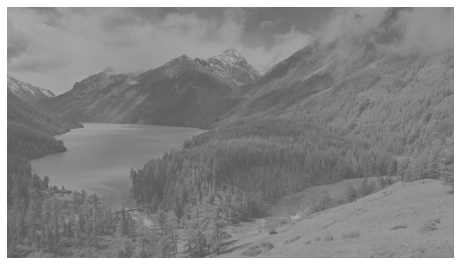

In [2]:
image = Image.open('image.png')

img_array = np.array(image)
height, width = img_array.shape[0], img_array.shape[1]

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(img_array, vmin=0, vmax=255)
plt.show()

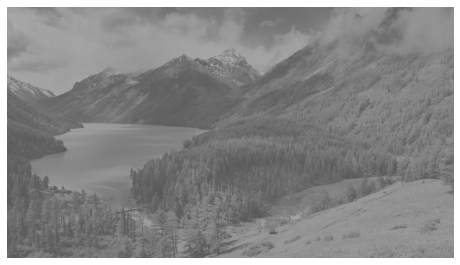

In [3]:
gray = np.zeros((height,width))
for i in range(height):
    for j in range(width):
        gray[i, j] = img_array[i, j][0]*0.6 + img_array[i, j][1]*0.3 + img_array[i, j][2]*0.1

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.savefig('grayscale.png')
plt.show()

img_array = gray

## Histogram

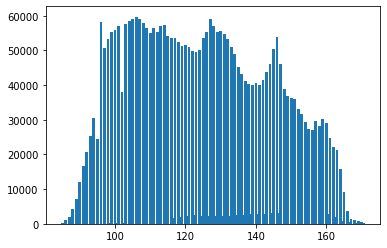

In [4]:
dic_colors = {}
for i in range(height):
    for j in range(width):
        if gray[i,j] in dic_colors:
            dic_colors[gray[i,j]] +=1
        else:
            dic_colors[gray[i,j]] =1

plt.bar(dic_colors.keys(), dic_colors.values())
plt.show()

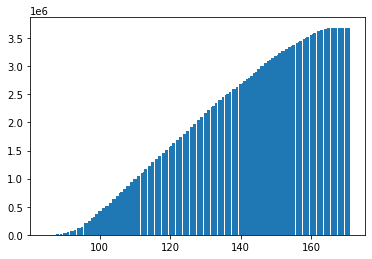

In [5]:
cum_colors = {}
total = 0
for i in sorted(dic_colors.keys()):
    cum_colors[i] = dic_colors[i] + total
    total = cum_colors[i]

plt.bar(cum_colors.keys(), cum_colors.values())
plt.show()

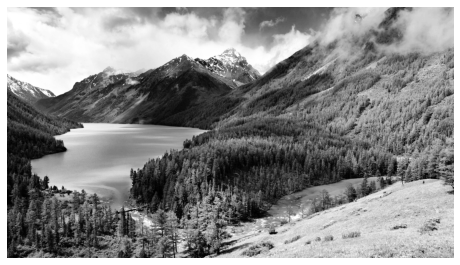

In [9]:
t_colors = {}
for i in dic_colors:
    t_colors[i] = 255 * cum_colors[i] /(width * height)

t_gray = np.zeros((height,width))
for i in range(height):
    for j in range(width):
        t_gray[i, j] = t_colors[gray[i,j]]

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(t_gray, cmap='gray', vmin=0, vmax=255)
plt.imsave('t_gray.png',t_gray, cmap = 'gray')
plt.show()


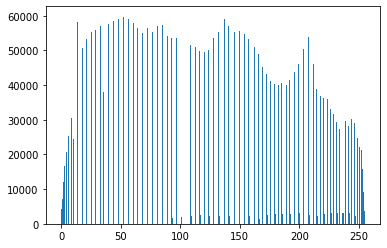

In [ ]:
dic_colors = {}
for i in range(height):
    for j in range(width):
        if t_gray[i,j] in dic_colors:
            dic_colors[t_gray[i,j]] +=1
        else:
            dic_colors[t_gray[i,j]] =1

plt.bar(dic_colors.keys(), dic_colors.values())
plt.show()

### Comparing input's and output's histogram, we can see that they share the same pattern but output's is expanded through X axe. 

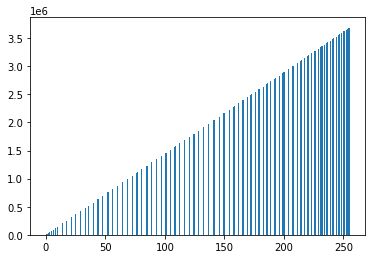

In [ ]:
cum_colors = {}
total = 0
for i in sorted(dic_colors.keys()):
    cum_colors[i] = dic_colors[i] + total
    total = cum_colors[i]

plt.bar(cum_colors.keys(), cum_colors.values())
plt.show()

### By comparing cummulative histogram of input and output, it can be seen output's has a linear pattern which means the picture contains a normal distirbution thrugh 0-255 grayscaled.